In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/Users/vipulgaur/Documents/Training/advanced-ML/MLSL/Classification/dataset'

In [3]:
df = pd.read_csv('kyphosis.csv')

In [23]:
len(df)

81

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
from sklearn.model_selection import train_test_split

x = df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
x_train.shape

(56, 3)

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')#,max_depth=3)

In [37]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predict = clf.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('\nConfusion Matrix : \n',confusion_matrix(y_test,predict))
print('\nClassification Report : \n',classification_report(y_test,predict))
print('\nAccuracy Score : \n',accuracy_score(y_test,predict))


Confusion Matrix : 
 [[16  3]
 [ 4  2]]

Classification Report : 
               precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25


Accuracy Score : 
 0.72


In [40]:
!pip install pydot

In [41]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [42]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [43]:
dot_data = StringIO()

In [44]:
export_graphviz(clf,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [45]:
type(graph)

list

In [46]:
graph

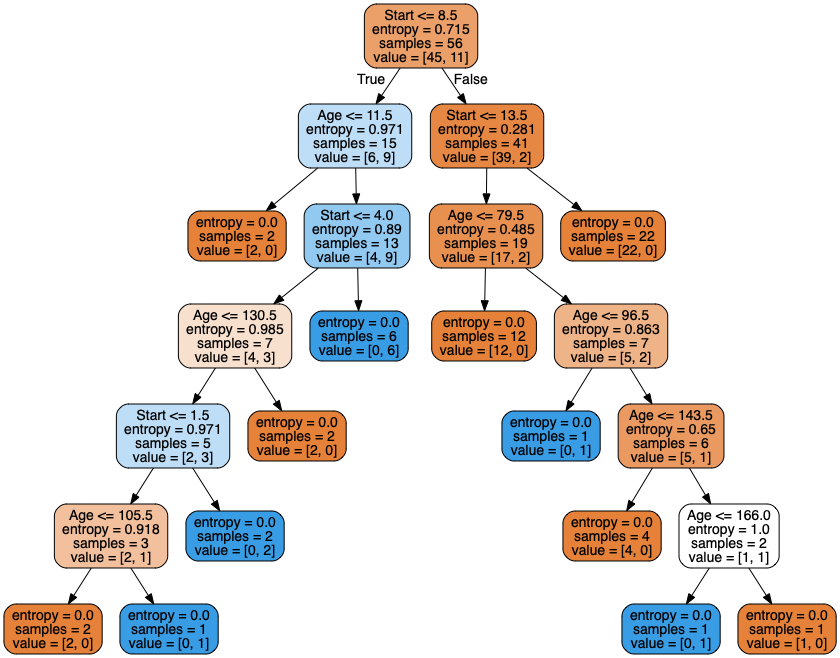

In [48]:
Image(graph[0].create_png())